# <center>Flight Delay Prediction- Deep Learning</center>

<div style="text-align: justify">
In the last decades, with the vast amount of digital data generated from various sources such 
as social media websites, social networks, audio and video content, and commercial and 
financial data, there has been a need for effective solutions to understand and extract 
information from this vast amount of data. Traditional data analysis approaches cannot handle 
large, complex datasets or cope with big data in general. To address the challenges of big data 
analysis, machine learning techniques coupled with scalable parallel computing systems have 
been combined as a promising solution. By leveraging parallel machine learning algorithms, 
scalable computing, and storage infrastructures, it becomes possible to analyze massive and 
intricate datasets, yielding valuable insights within reasonable timeframes (Talia and Trunfio, 
2012). The aim of the proposal is utilization to explore the utilization of parallel computing 
techniques to tackle a major economic challenge in big data analytics: flight delay prediction. 
Each year, around 20% of airline flights experience delays or cancellations, primarily 
attributed to factors such as adverse weather conditions, carrier equipment issues, and 
technical problems at airports. These delays incur substantial costs for both airlines and 
passengers. For example, in 2007, flight delays were estimated to have cost the US economy 
$32.9 billion, with more than half of the financial burden borne by passengers (Ball et al., 
2010). Accurate and timely weather forecasts are essential to making informed 
decisions and minimizing potential risks. Flight delays due to adverse weather conditions can have significant economic and 
operational consequences for airlines, passengers, and the entire air transport system. Big data 
techniques have been proposed to load, store, manage, and analyze that vast amount of weather data with several data mining algorithms to predict flight delays based on weather observations. By applying big data analytics to the weather forecasting dataset, the challenges associated with traditional data management techniques and technologies can be solved. 
The core of this research proposal is to evaluate the influence of weather observation factors 
on flight delays. Also, build a predictor model to accurately predict the departure flights 
delays according to weather observations using a big data analytics approach through the 
process of analyzing huge amounts of weather and flight data to detect correlations and 
insights. That enables better decision-making and potentially reduces the impact of weather related delays.

</div>


## Loading the neccessary libraries and packages

In [1]:
# pandas used for data manipulation and analysis, providing data structures like DataFrames for working with tabular data. 
import pandas as pd  

# numpy is numerical Python, the fundamental package for scientific computing in Python.  
import numpy as np    

# seaborn is a data visualization library based on Matplotlib that designed to create informative and attractive statistical graphics.
import seaborn as sns

# Extends the capabilities of pandas to allow for working with geospatial data.
import geopandas as gpd

# Creating interractive graphs.
import plotly.express as px
import plotly.graph_objs as go

# A common library for creating static, animated, and interactive visualizations in Python.
import matplotlib                    # pyplot module

# Pretty-print lists, tuples, & dictionaries recursively in a human-readable format.
import pprint                        

# Providing a high level interface for creating various types of plots and charts.
import matplotlib.pyplot as plt


In [2]:
# Taking care of jupyter environment 
# show graphs in-line, and turn on/off pretty_printing of lists
%matplotlib inline 
%pprint       

Pretty printing has been turned OFF


In [3]:
#ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# retina quality: to better display the plots. Any display with retina resolution will make the figures look better
# if your monitor's resolution is sub-retina than the improvement will be less noticeable [2].
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

## Exploratory Data Analysis(EDA)¶

#### Reading Data from Files

In [50]:
# Read the dataset from the CSV file
X = pd.read_csv('features.csv')                   # Features X
X_pca = pd.read_csv('features_pca.csv')           # Features generated by PCA
y = pd.read_csv('labels.csv')                     # Target-"Label class"  

#### Display the shape of X, X_pca, y

In [51]:
print(X.shape, X_pca.shape, y.shape)

(6489062, 25) (6489062, 15) (6489062, 1)


* X contains all the features which are 25.
* X_pca contain the features generated by PCA which are 15.
* y is the class label 

####  Display X, X_apc, y

In [52]:
X = X.values
print(X)

[[0.         1.         0.16666667 ... 0.         0.6        0.08614565]
 [0.         1.         0.11111111 ... 0.         0.6        0.08614565]
 [0.         1.         0.05555556 ... 0.         0.6        0.08614565]
 ...
 [1.         1.         0.83333333 ... 0.         0.752      0.45026643]
 [1.         1.         0.88888889 ... 0.         0.752      0.45026643]
 [1.         1.         0.88888889 ... 0.         0.752      0.45026643]]


In [53]:
X_pca = X_pca.values
print(X_pca)

[[-0.55507791 -0.18304123  0.17331148 ...  0.06310917  0.01919039
  -0.06740408]
 [-0.34403764 -0.03961176  0.71717081 ...  0.11566046 -0.03808954
   0.10132898]
 [-0.39863296 -0.04372888  0.72448134 ...  0.14249348 -0.10179438
   0.06557709]
 ...
 [ 0.71013878 -0.30248506  0.34229309 ...  0.02197816  0.15952869
  -0.08903957]
 [ 0.71053374 -0.29301182  0.32452999 ...  0.02493397  0.15989118
  -0.08416036]
 [ 0.72068105 -0.2945889   0.32581268 ...  0.01881651  0.17286748
  -0.07937227]]


In [55]:
y = (y.values).reshape(-1)
# y = y.reshape(-1)
print(y)

[0 0 0 ... 0 0 1]


In [56]:
print(X.shape, X_pca.shape, y.shape)

(6489062, 25) (6489062, 15) (6489062,)


We are ready to build a deep learning models

## Deep Learning:

In [10]:
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

#### Split the data into train set and test set

Before deploying a deep learning model in an industry setting, it's crucial to ensure that the model generalizes effectively to unseen test data, thereby avoiding overfitting. Overfitting is a common concept in data science, indicating that a model has learned the training data too well but struggles with new, unseen data. To assess whether overfitting is occurring, we typically split the dataset into two parts: a training set and a test set. 

- Training Set (X_train, y_train) - 80% ( 5,191,249 samples): This portion is used to train the ML model.
- Testing Set  (X_test, y_test)   - 20% ( 1,297,813 samples): This portion is reserved for evaluating and assessing the model's performance.

The Scikit-Learn library provides a convenient built-in function called train_test_split to facilitate this data splitting process. Let's write a function to split the dataset.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    # test set= 20% and the random seed=42
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)     

(4542343, 25) (4542343, 1) (1946719, 25) (1946719, 1)


Using random_state=42 (or any integer) is a way to set the random seed for the randomization process, ensuring the reproducibility of results. In simpler terms, employing the same random_state value will consistently produce the same data split each time the code is run, resulting in identical outcomes. Reproducibility is of significant importance in data science and various other domains. [https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79]

## Construct the DNN model

### 1. Using the original dataset that contains 6489062 rows and 26 columns.

#### First model

<b>Simple Feedforward Neural Network</b> is a fundamental type of artificial neural network used in supervised learning. In feedforward neural networks, data moves in a single direction: from the input layer, through any hidden layers, and ultimately to the output layer, enforcing a strict forward flow. Each layer comprises interconnected nodes, commonly known as neurons. These neurons receive inputs from the preceding layer, process the information, and transmit the results to the subsequent layer. Activation functions are applied to these inputs at each node, introducing non-linearity to the model. 

In [26]:
#  Definfe the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1664      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


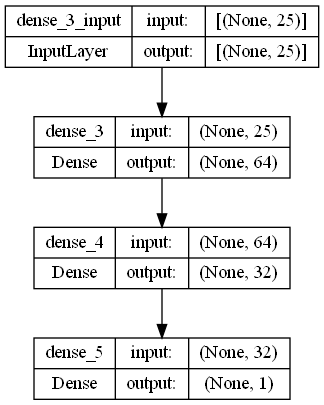

In [28]:
#Use the Keras Sequential Architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Our artificial neural network (ANN) architecture is structured with an input layer consisting of 25 neurons, each representing a feature from the dataset. Following the input layer, there are two hidden layers with 64 and 32 neurons respectivel. These layers employ the rectified linear unit (ReLU) activation function, introducing non-linearity to the model. The output layer, crucial for binary classification, contains a single neuron employing a sigmoid activation function. This configuration is optimal for predicting binary outcomes, making it suitable for tasks like determining flight delays, where the objective is to classify instances as delayed or not delayed based on the given features.

#### Using <b>Adam</b> optimizer and <b>binary_crossentropy</b> loss

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- Optimizer= 'adam' because Adam is a default choice for many deep learning tasks because it combines the benefits of both AdaGrad and RMSProp like faster convergence, and effective parameter updates, enhancing training efficiency.
- loss = 'binary_crossentropy'is an ideal choice for binary classification.
- metrics='accuracy' as accuracy it is a crucial measure for classification tasks to assess the model's ability to predict the correct class. 

In [30]:
# Train the Model (verbos = 2 to display the training progress for each epochs )
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 

Epoch 1/10
141949/141949 - 194s - loss: 0.4517 - accuracy: 0.8136 - val_loss: 0.4465 - val_accuracy: 0.8150 - 194s/epoch - 1ms/step
Epoch 2/10
141949/141949 - 197s - loss: 0.4460 - accuracy: 0.8154 - val_loss: 0.4458 - val_accuracy: 0.8157 - 197s/epoch - 1ms/step
Epoch 3/10
141949/141949 - 193s - loss: 0.4443 - accuracy: 0.8160 - val_loss: 0.4448 - val_accuracy: 0.8158 - 193s/epoch - 1ms/step
Epoch 4/10
141949/141949 - 193s - loss: 0.4433 - accuracy: 0.8163 - val_loss: 0.4428 - val_accuracy: 0.8165 - 193s/epoch - 1ms/step
Epoch 5/10
141949/141949 - 194s - loss: 0.4427 - accuracy: 0.8166 - val_loss: 0.4437 - val_accuracy: 0.8166 - 194s/epoch - 1ms/step
Epoch 6/10
141949/141949 - 193s - loss: 0.4422 - accuracy: 0.8167 - val_loss: 0.4423 - val_accuracy: 0.8165 - 193s/epoch - 1ms/step
Epoch 7/10
141949/141949 - 194s - loss: 0.4418 - accuracy: 0.8169 - val_loss: 0.4425 - val_accuracy: 0.8165 - 194s/epoch - 1ms/step
Epoch 8/10
141949/141949 - 193s - loss: 0.4415 - accuracy: 0.8170 - val_loss

<b>Epoch:</b> is a one complete pass through the entire training dataset. During one epoch, the neural network's parameters (weights and biases) are updated based on the gradients of the loss function, computed on the entire training dataset.
<b>Loss</b> The loss metric represents the error between predicted and actual outcomes.
<b>Accuracy</b> The accuracy indicates the proportion of correct predictions.


The previous result displays the performance of a neural network model trained for flight delay prediction over ten epochs. Each epoch records the loss and accuracy for both the training and validation sets. The accuracy shows a consistent improvement while the loss decreases progressively, indicating the model's ability to learn from the training data and generalize well to the validation set.  

Let's create visual representations illustrating the loss and accuracy for both the training and validation sets.

In [32]:
def accuracy_loss_plot(history):
    '''
    To plot the model accuracy and loss for the training and validation set over epochs.
    '''
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], fontsize=12)
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'],fontsize=12)
    plt.show()

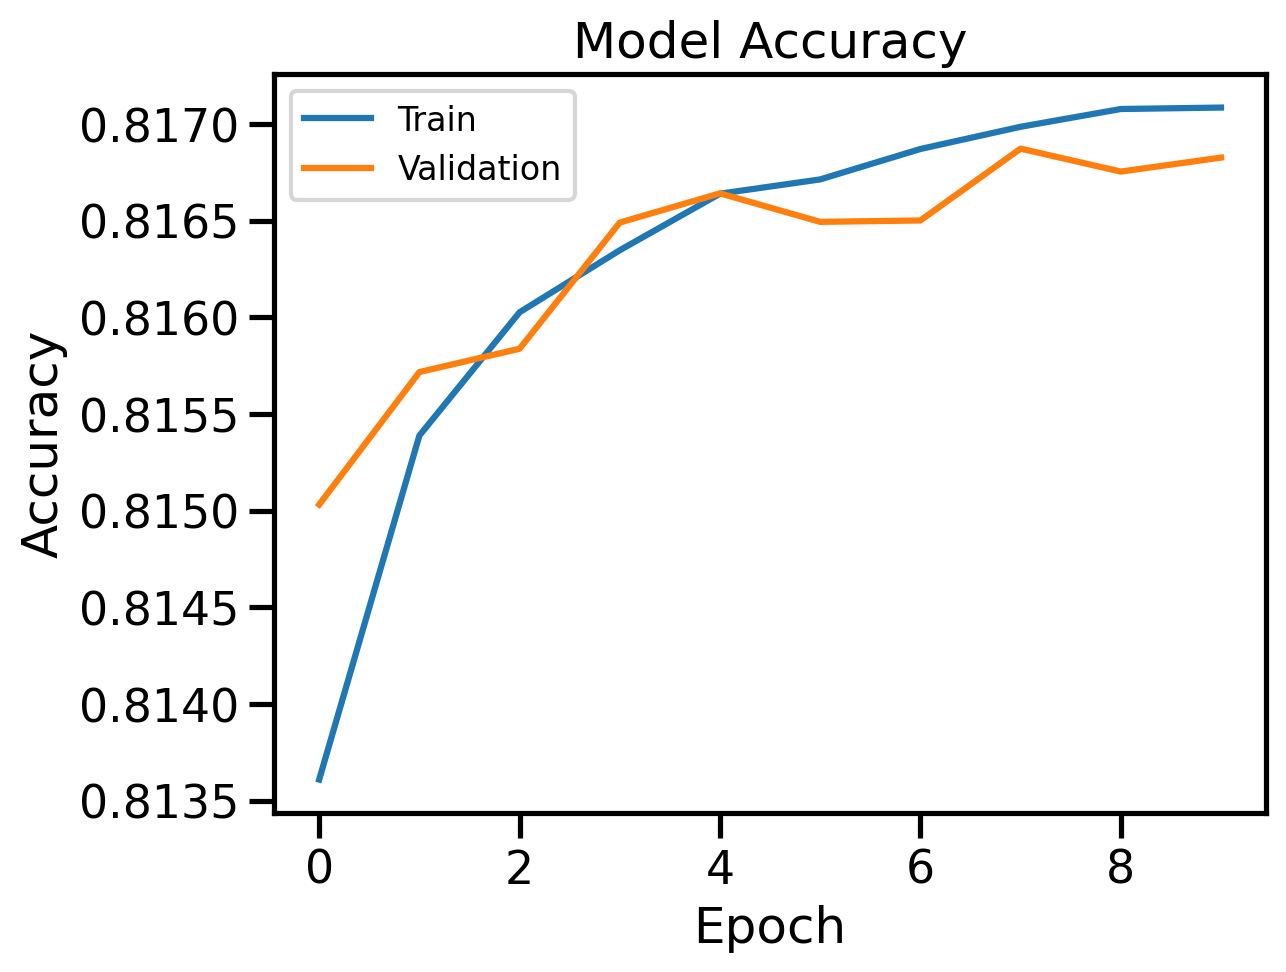

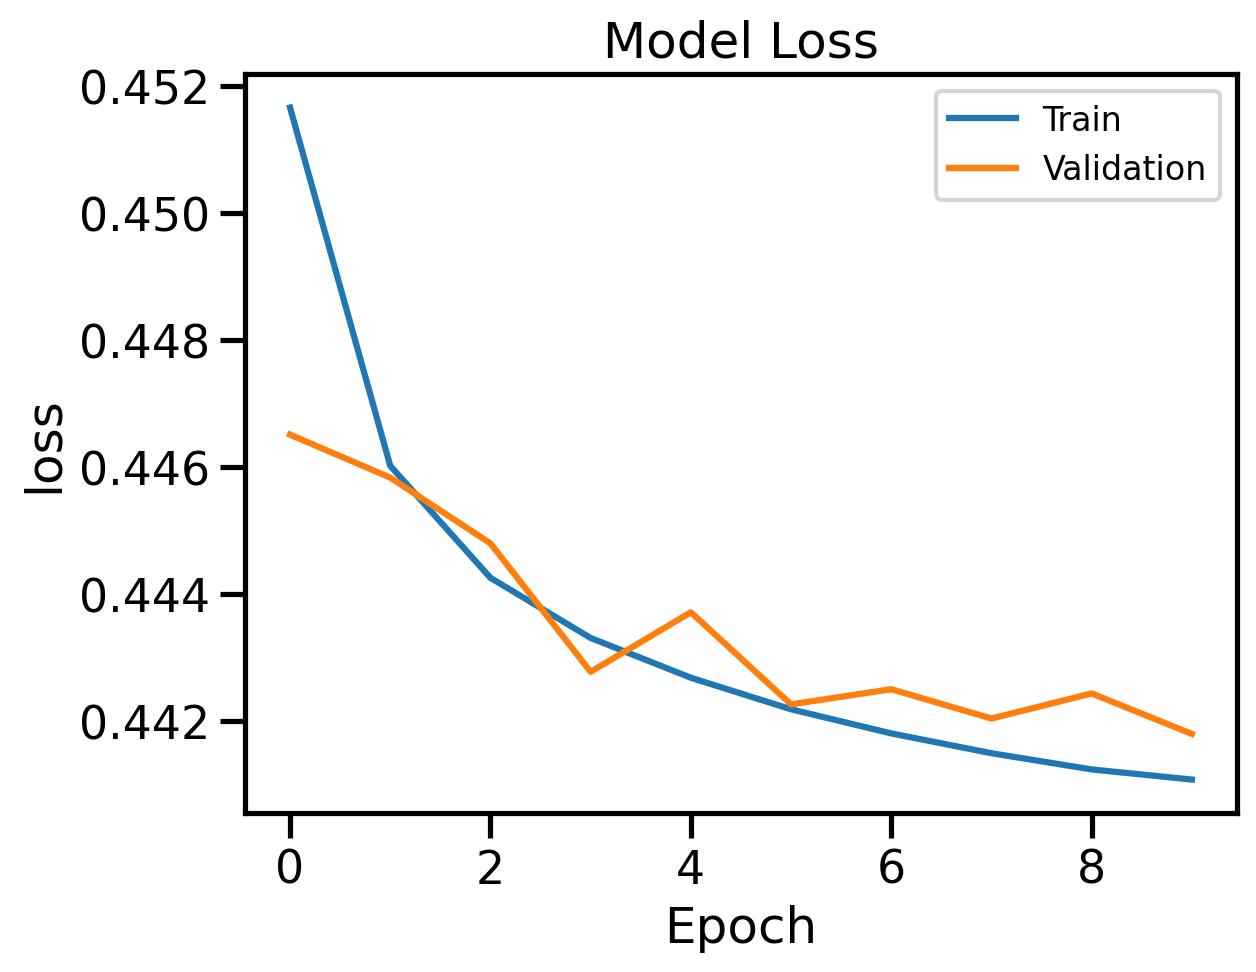

In [35]:
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history) 

The provided figures show the performance of the ANN model designed for binary classification of flight delays (1 if delay exceeds 15 minutes, 0 otherwise). The model demonstrates consistent improvement in accuracy and reduction in loss across the 10 epochs, indicating its effecient and steady performance on both the training and validation sets.

In the accuracy versus epoch plot, the continual rise in both training and validation accuracies illustrates the model's robustness and its capacity to generalize well to unseen data. Specifically, the model's accuracy on the training set starts at 81.36% and consistently improves, ultimately reaching 81.71% in the last epoch. Similarly, the validation accuracy begins at 81.50% and steadily advances to 81.68% by the end of training.

The loss curves for both the training and validation sets display a consistent downward trend across the ten epochs, indicating effective learning and model convergence. In the plot displaying loss versus epoch, the training loss begins at 0.4517 and progressively decreases to 0.4411, reflecting a decline in error. Similarly, the validation loss starts at 0.4465 and diminishes to 0.4418, demonstrating that the model is not overfitting and performs well on unseen data. This decline in loss signifies that the model is effectively capturing relevant patterns in the dataset, leading to improved predictive performance. 

<br>

#### Using <b>SGD</b> optimizer and <b>binary_crossentropy</b> loss

Let's change the optimizer to <b>Stochastic Gradient Descent (SGD)</b>. SGD is is a basic optimization algorithm used in training machine learning models. 

In [41]:
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
# Train the Model (verbos = 2 to display the training progress for each epochs )
history_SGD = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 

Epoch 1/10
141949/141949 - 193s - loss: 0.4393 - accuracy: 0.8177 - val_loss: 0.4408 - val_accuracy: 0.8174 - 193s/epoch - 1ms/step
Epoch 2/10
141949/141949 - 191s - loss: 0.4391 - accuracy: 0.8177 - val_loss: 0.4399 - val_accuracy: 0.8175 - 191s/epoch - 1ms/step
Epoch 3/10
141949/141949 - 194s - loss: 0.4390 - accuracy: 0.8178 - val_loss: 0.4399 - val_accuracy: 0.8173 - 194s/epoch - 1ms/step
Epoch 4/10
141949/141949 - 215s - loss: 0.4390 - accuracy: 0.8178 - val_loss: 0.4400 - val_accuracy: 0.8173 - 215s/epoch - 2ms/step
Epoch 5/10
141949/141949 - 196s - loss: 0.4389 - accuracy: 0.8178 - val_loss: 0.4397 - val_accuracy: 0.8174 - 196s/epoch - 1ms/step
Epoch 6/10
141949/141949 - 201s - loss: 0.4389 - accuracy: 0.8179 - val_loss: 0.4398 - val_accuracy: 0.8173 - 201s/epoch - 1ms/step
Epoch 7/10
141949/141949 - 198s - loss: 0.4389 - accuracy: 0.8178 - val_loss: 0.4396 - val_accuracy: 0.8174 - 198s/epoch - 1ms/step
Epoch 8/10
141949/141949 - 195s - loss: 0.4388 - accuracy: 0.8179 - val_loss

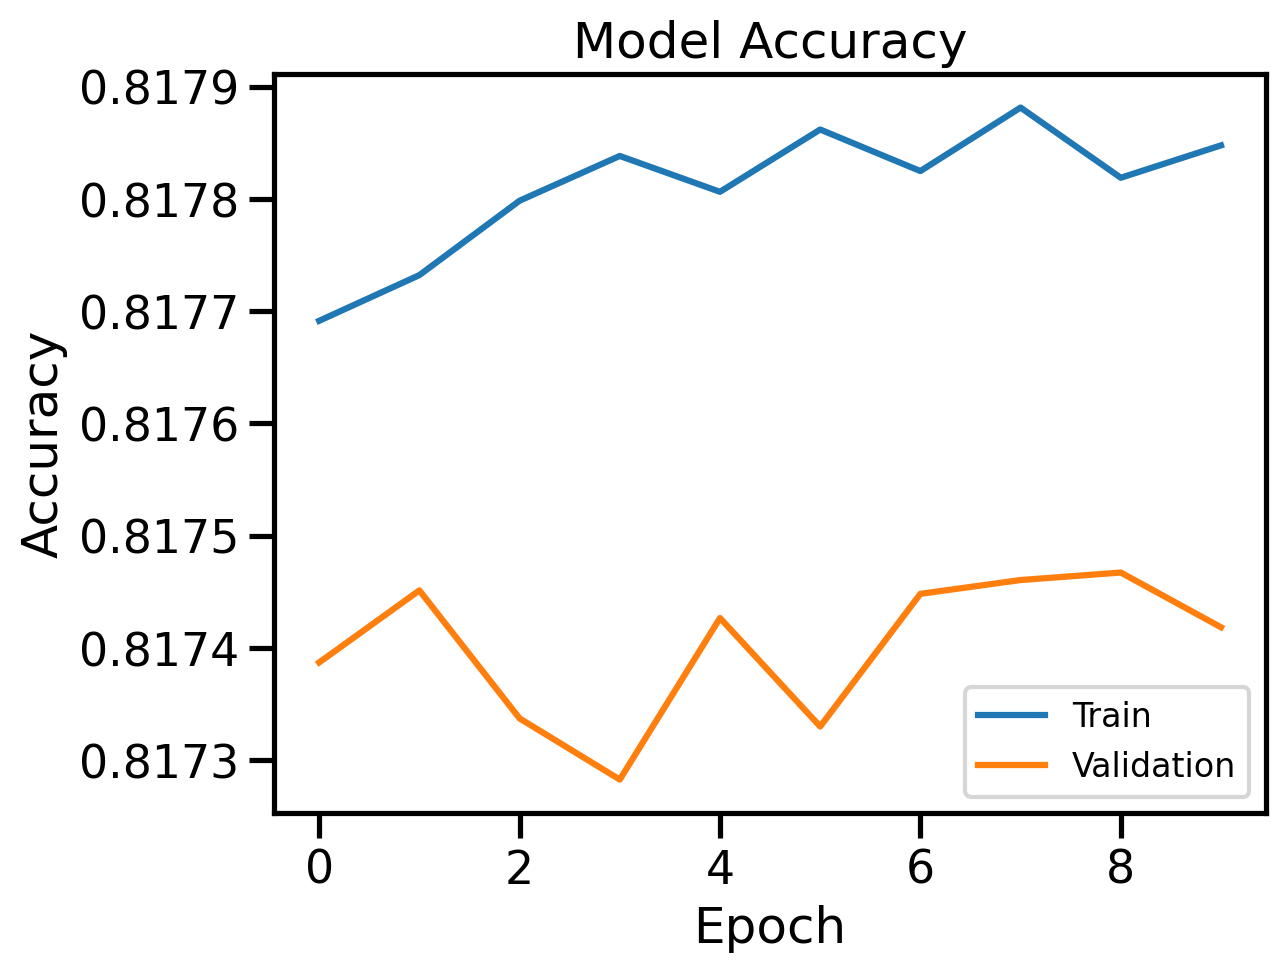

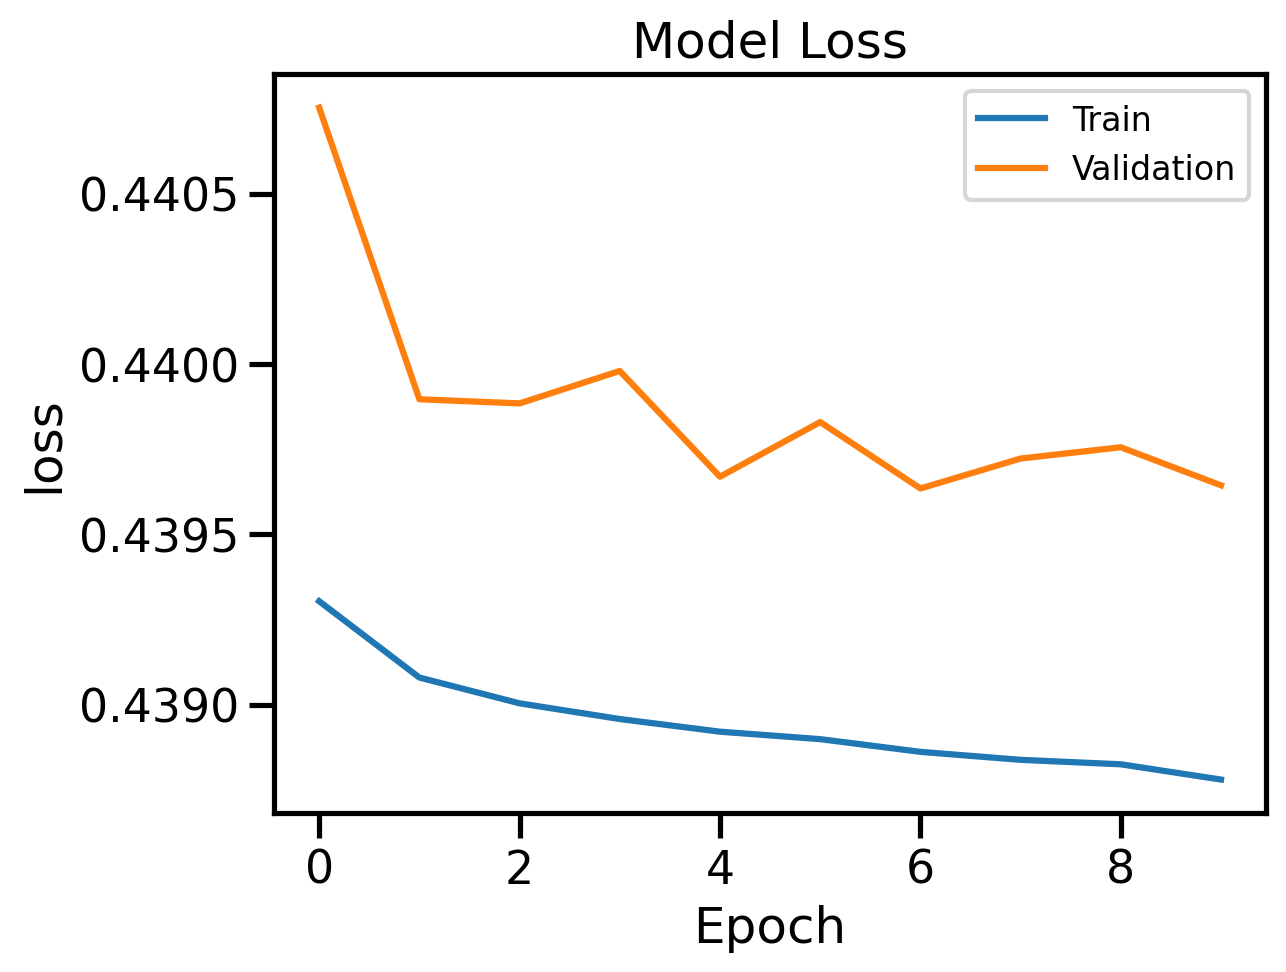

In [43]:
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history_SGD) 

With the SGD optimizer, the model begins with 81.77% accuracy, reaching 81.78% for the training set, and initially attains 81.74% validation accuracy in the first epoch. Following this, validation accuracy fluctuates randomly between 81.75% and 81.73%, ultimately stabilizing at 81.74% in later epochs. The loss trends consistently decrease for the training set and exhibit random fluctuations for the validation set, but they generally decrease over the ten epochs.

### Evaluation on using the whole dataset

Overall, SGD optimizer exhibits a slightly higher accuracy 81.78% compared to Adam, 81.71%. Both Stochastic Gradient Descent (SGD) and Adam are stochastic optimizers, meaning that the loss and accuracy may show occasional spikes instead of a consistent decrease or increase with each step. However, as long as the general trend is a reduction in loss and an increase in accuracy, these fluctuations are normal. It's important to consider that the model could be overfitting to the training data in this scenario. To address potential overfitting, incorporating dropout layers could be beneficial in enhancing the model's performance and generalization.

<br>

### 2. Using the reduced dataset generated by PCA that contains 6489062 rows and 15 columns.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1024      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


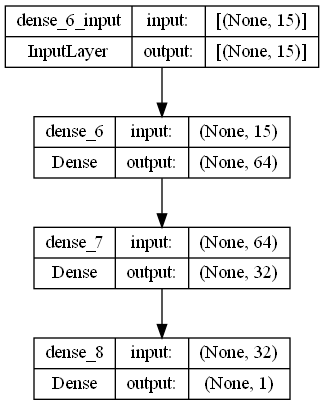

In [69]:
#  Definfe the model
model = Sequential([
    Dense(64, activation='relu', input_dim=15 ),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()
#Use the Keras Sequential Architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [70]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y, test_size=0.3, random_state=42) 
print(X_train_pca.shape, y_train_pca.shape, X_test_pca.shape, y_test_pca.shape)

(4542343, 15) (4542343,) (1946719, 15) (1946719,)


Epoch 1/10
141949/141949 - 202s - loss: 0.4563 - accuracy: 0.8111 - val_loss: 0.4534 - val_accuracy: 0.8112 - 202s/epoch - 1ms/step
Epoch 2/10
141949/141949 - 209s - loss: 0.4525 - accuracy: 0.8114 - val_loss: 0.4519 - val_accuracy: 0.8115 - 209s/epoch - 1ms/step
Epoch 3/10
141949/141949 - 198s - loss: 0.4513 - accuracy: 0.8116 - val_loss: 0.4515 - val_accuracy: 0.8114 - 198s/epoch - 1ms/step
Epoch 4/10
141949/141949 - 195s - loss: 0.4505 - accuracy: 0.8117 - val_loss: 0.4507 - val_accuracy: 0.8117 - 195s/epoch - 1ms/step
Epoch 5/10
141949/141949 - 199s - loss: 0.4500 - accuracy: 0.8119 - val_loss: 0.4506 - val_accuracy: 0.8119 - 199s/epoch - 1ms/step
Epoch 6/10
141949/141949 - 196s - loss: 0.4496 - accuracy: 0.8119 - val_loss: 0.4498 - val_accuracy: 0.8119 - 196s/epoch - 1ms/step
Epoch 7/10
141949/141949 - 200s - loss: 0.4492 - accuracy: 0.8120 - val_loss: 0.4494 - val_accuracy: 0.8119 - 200s/epoch - 1ms/step
Epoch 8/10
141949/141949 - 195s - loss: 0.4489 - accuracy: 0.8121 - val_loss

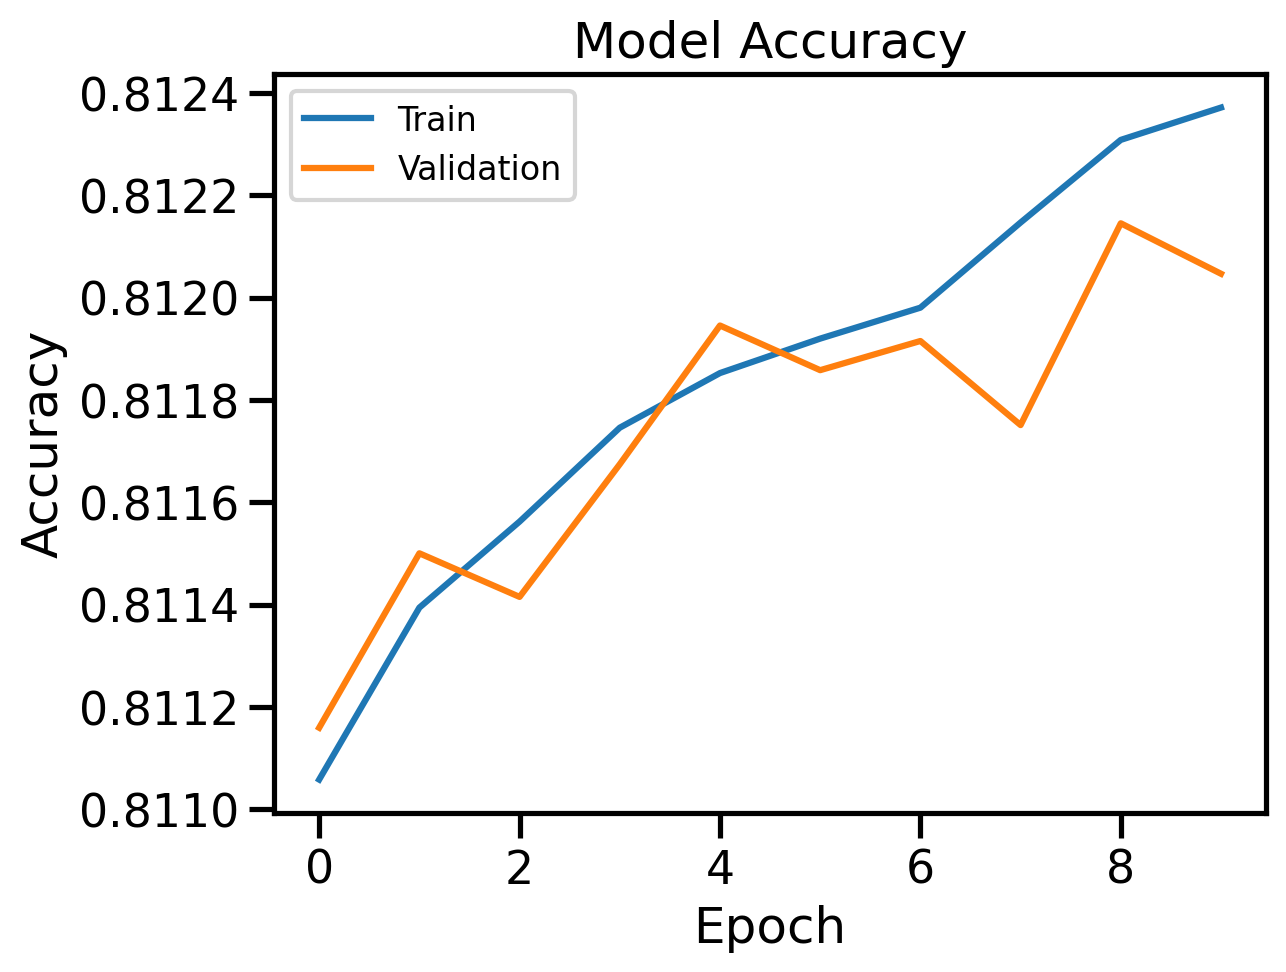

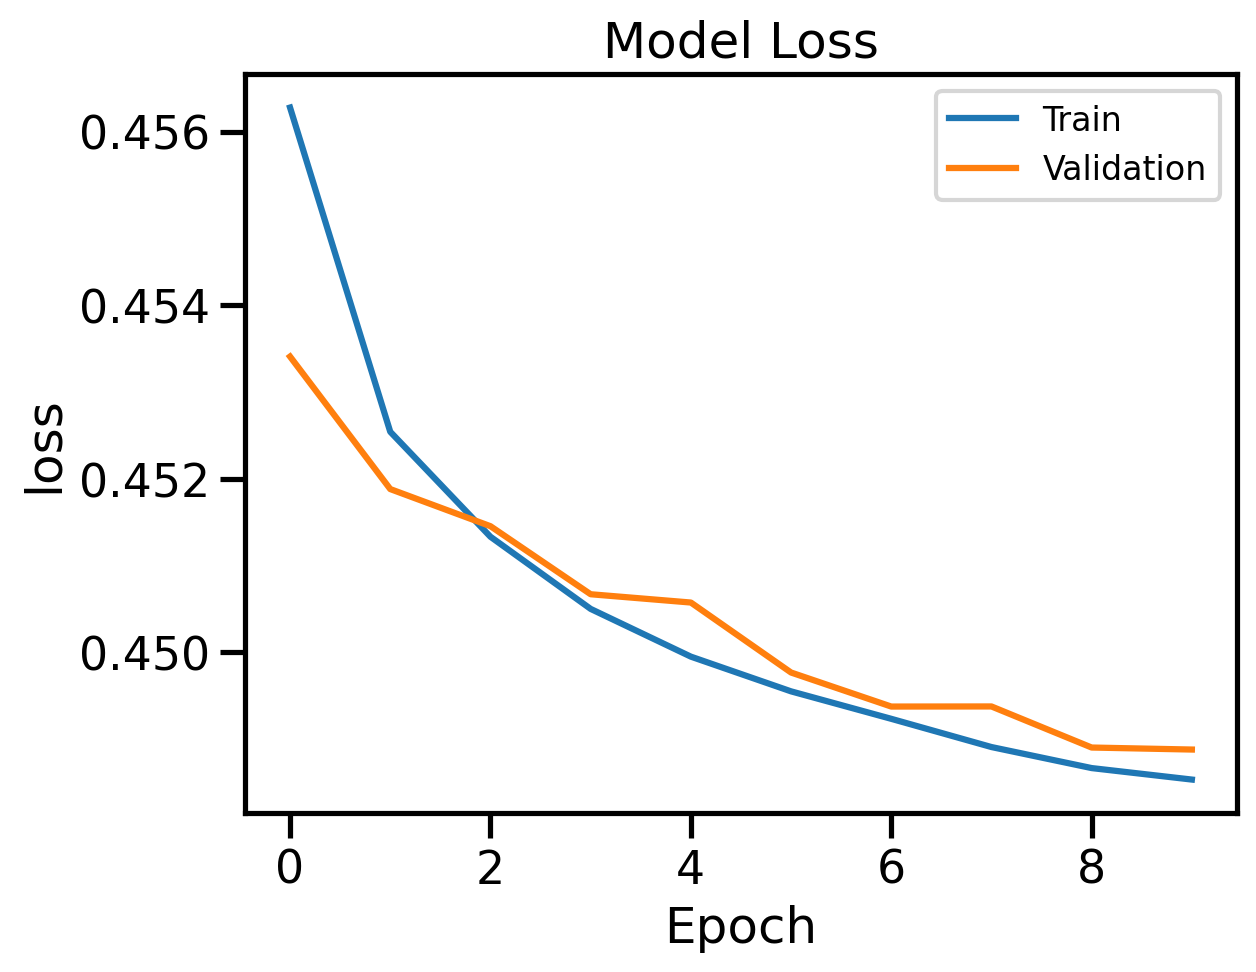

In [71]:
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model (verbos = 2 to display the training progress for each epochs )
history_adam_pca = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history_adam_pca) 

The model, utilizing the 'Adam' optimizer and features selected through PCA applied to the original dataset. The model consistently demonstrated a decrease in loss and a gradual increase in accuracy across the 10 epochs for both the training and validation sets. For example, in the first epoch, the training accuracy was 81.11%, improving to 81.24% by the tenth epoch. Concurrently, the validation accuracy followed a similar progression, starting at 81.12% and reaching 81.20%. The loss steadily decreased for the training set from 0.4563 to 0.4485, and for the validation set, it decreased from 0.4534 to 0.4489 during the ten epochs. Overall, the model effectively learned and generalized, capturing important patterns in the data to make more accurate predictions.

Epoch 1/10
141949/141949 - 193s - loss: 0.4472 - accuracy: 0.8128 - val_loss: 0.4480 - val_accuracy: 0.8125 - 193s/epoch - 1ms/step
Epoch 2/10
141949/141949 - 189s - loss: 0.4469 - accuracy: 0.8129 - val_loss: 0.4475 - val_accuracy: 0.8126 - 189s/epoch - 1ms/step
Epoch 3/10
141949/141949 - 191s - loss: 0.4468 - accuracy: 0.8129 - val_loss: 0.4476 - val_accuracy: 0.8126 - 191s/epoch - 1ms/step
Epoch 4/10
141949/141949 - 189s - loss: 0.4467 - accuracy: 0.8129 - val_loss: 0.4476 - val_accuracy: 0.8124 - 189s/epoch - 1ms/step
Epoch 5/10
141949/141949 - 191s - loss: 0.4467 - accuracy: 0.8129 - val_loss: 0.4474 - val_accuracy: 0.8127 - 191s/epoch - 1ms/step
Epoch 6/10
141949/141949 - 196s - loss: 0.4466 - accuracy: 0.8130 - val_loss: 0.4477 - val_accuracy: 0.8126 - 196s/epoch - 1ms/step
Epoch 7/10
141949/141949 - 210s - loss: 0.4466 - accuracy: 0.8130 - val_loss: 0.4475 - val_accuracy: 0.8126 - 210s/epoch - 1ms/step
Epoch 8/10
141949/141949 - 200s - loss: 0.4466 - accuracy: 0.8130 - val_loss

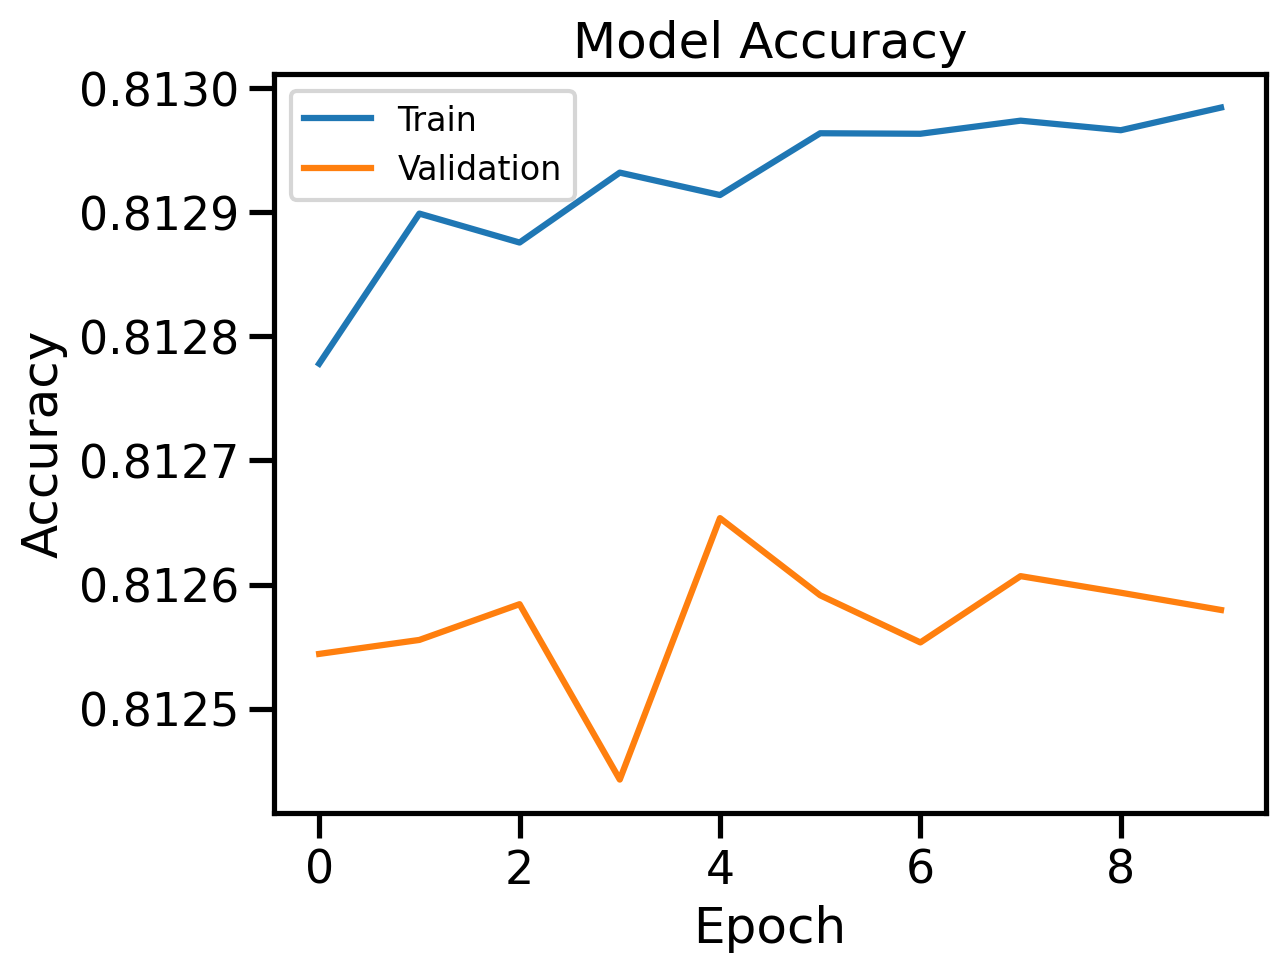

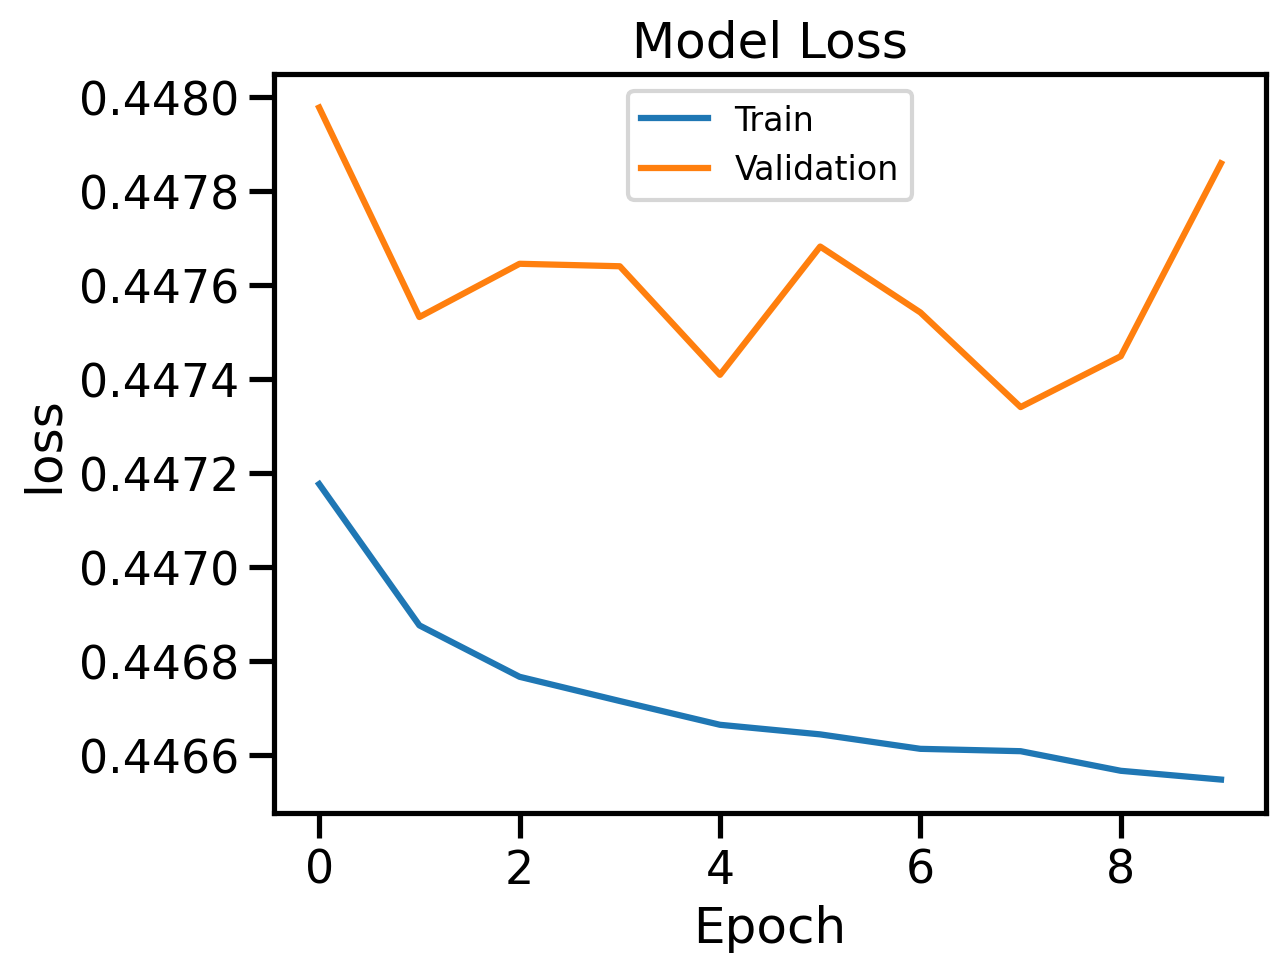

In [72]:
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model (verbos = 2 to display the training progress for each epochs )
history_SGD_pca  = model.fit(X_train_pca, y_train_pca, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2) 
# Call the accuracy_loss_plot function to visualize the model performance during training.
accuracy_loss_plot(history_SGD_pca) 

In the first epoch, the model started with a training accuracy of 81.28%, which slightly increased to 81.30% by the tenth epoch. Similarly, the validation accuracy began at 81.25% and gradually progressed to 81.26% by the end of the training. The loss for the training set decreased from 0.4472 to 0.4465, indicating a consistent reduction. For the validation set, the loss decreased from 0.4480 to 0.4479 across the ten epochs. 

### Evaluation after applyiny the redicutional dimonsial PCA 

Overall, both optimizers achieved effective learning and model convergence, resulting in a similar accuracy trend. Despite SGD acheived higher accuracy in the training set (81.30% vs. 81.24%) Adam optimizer achieved a slightly higher validation accuracy (81.20% vs. 81.26%) and a slightly lower final loss (0.4485 vs. 0.4465). In General, Adam optimizer demonstrates a tendency to reach convergence at a faster pace compared to SGD.